# Libraries and data

In [1]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/4. Clustering - Gaussian Mixture Model

/content/drive/MyDrive/Data Mining for Business in Python/4. Clustering - Gaussian Mixture Model


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [ ]:
#loading the data
data = pd.read_csv("Country-data.csv")
data.head()
dataset = data.iloc[:, 1:]
dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Clustering

Text(0.5, 0, 'number of components')

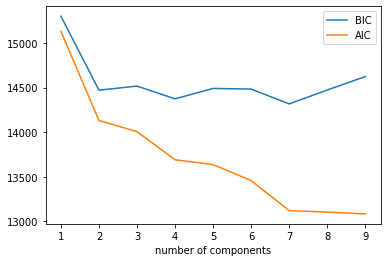

In [ ]:
#finding optimal number of cluster
n_components = np.arange(1,10)
models = [GaussianMixture(n, 
                          random_state = 1502).fit(dataset)
          for n in n_components]
plt.plot(n_components,
         [m.bic(dataset) for m in models],
         label = 'BIC')
plt.plot(n_components,
         [m.aic(dataset) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel('number of components')

In [ ]:
#GMM
model = GaussianMixture(n_components = 4, 
                        random_state = 1502).fit(dataset)

#Interpretation

In [ ]:
#Predicting cluster by country
cluster = pd.Series(model.predict(dataset))
cluster[:3]

0    0
1    1
2    1
dtype: int64

In [ ]:
#assign a cluster in the dataframe
data['Cluster'] = cluster
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1.00,0.00,0.0,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0.47,0.53,0.0,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0.09,0.91,0.0,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1.00,0.00,0.0,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0.00,1.00,0.0,0.0


In [ ]:
#searching a specific country
data.loc[data['country'] == 'Portugal']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
122,Portugal,3.9,29.9,11.0,37.4,27200,0.643,79.8,1.39,22500,2,0.0,0.0,1.0,0.0


In [ ]:
#Create the probabilities of belonging to any cluster
probabilities = round(pd.DataFrame(model.predict_proba(dataset)),2)
probabilities.head(2)

,0,1,2,3
0,1.00,0.00,0.0,0.0
1,0.47,0.53,0.0,0.0


In [ ]:
#joining probabilities with data
data = pd.concat([data, probabilities], axis = 1)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1.00,0.00,0.0,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0.47,0.53,0.0,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0.09,0.91,0.0,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1.00,0.00,0.0,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0.00,1.00,0.0,0.0


In [ ]:
#interpreting the cluster
interpretation = pd.DataFrame(model.means_,
                              columns = list(dataset.columns))
interpretation

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,63.722474,31.778417,6.264790,45.308663,4913.809381,9.863647,64.428691,3.902065,2248.625321
1,16.050529,48.084698,6.407898,49.131804,18747.283556,7.375799,74.784760,2.093548,10878.569213
2,4.823374,50.845081,9.206409,45.417744,42898.898956,2.499032,80.368767,1.720567,40168.111472
3,4.875000,85.250000,7.640000,61.900000,83625.000000,4.216750,81.000000,1.792500,84425.000000


In [ ]:
data[data[3] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,0.0,0.0,0.0,1.0
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,3,0.0,0.0,0.0,1.0
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,3,0.0,0.0,0.0,1.0
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,3,0.0,0.0,0.0,1.0
